In [ ]:
import pandas as pd
#loading the dataset and reading it as a dataframe using pandas
data = pd.read_csv("/content/drive/MyDrive/BankNote_Authentication.xls")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
from sklearn.model_selection import train_test_split
df = data.drop('class', axis = 1)
#creating new dataframe with only class column
df_target = data['class']
#splitting the dataset into training, testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3, random_state=42, stratify=df_target)

#printing the counts of training, testing and validation datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (960, 4)
y_train shape: (960,)
X_test shape: (412, 4)
y_test shape: (412,)


In [ ]:
X_train.describe()

,variance,skewness,curtosis,entropy
count,960.000000,960.000000,960.000000,960.000000
mean,0.505812,1.886929,1.367703,-1.200551
std,2.846293,5.858852,4.367236,2.096548
min,-7.042100,-13.773100,-5.215900,-8.548200
25%,-1.748175,-1.604225,-1.682500,-2.458425
50%,0.521620,2.174850,0.615345,-0.584060
75%,2.901750,6.781550,3.089500,0.376710
max,6.824800,12.951600,17.927400,2.135300


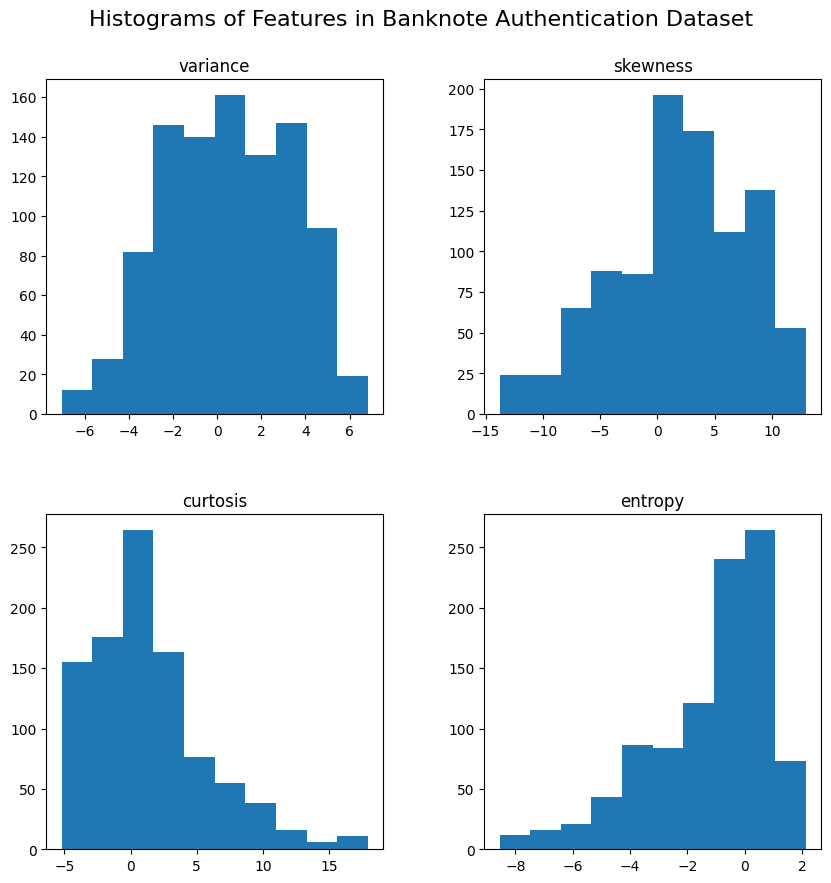

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all features
X_train.hist(figsize=(10, 10), grid=False)
plt.suptitle('Histograms of Features in Banknote Authentication Dataset', fontsize=16, y=0.95)
plt.show()

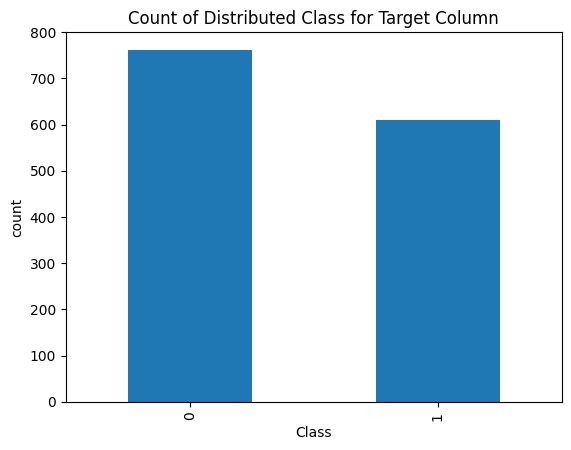

In [ ]:
#plotting the count of two classes of target column
df_target.value_counts().plot(kind='bar')
plt.title('Count of Distributed Class for Target Column')
plt.ylabel('count')
plt.xlabel('Class')
plt.show()

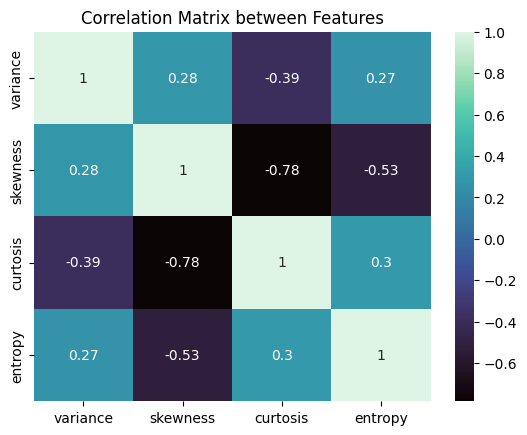

In [ ]:
import seaborn as sns
corr=X_train.corr()
#plotting the correlation values using seaborn
sns.heatmap(corr,annot=True,cmap='mako')
plt.title('Correlation Matrix between Features')
plt.show()

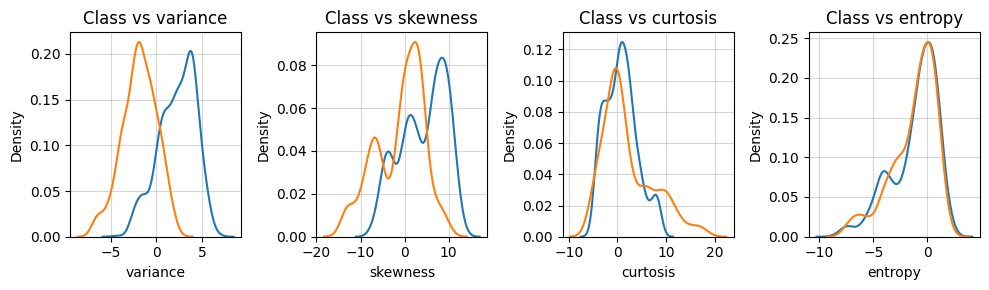

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
feat_names = data.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in feat_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(data[col][data['class'] ==0], label = 'Fake note')
    sns.kdeplot(data[col][data['class'] ==1], label = 'Real note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#created a pipeline to scale the data
pipe = make_pipeline(StandardScaler())
#scaling the X_train using the pipeline
X_train = pipe.fit_transform(X_train)
#scaling the X_test using the pipeline
X_test = pipe.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
data1 = data
#creating a function and defining the rules
def predict_banknote(var, skew, curt, auth):
    if auth < 0.5 and var < -1.5 and skew < -2.5 and curt < -0.5:
        return "Authentic"
    else:
        return "Counterfeit"

#created a column in data1[prediction] and inserting the result that we are getting from predict_banknote
data1['prediction'] = data1.apply(lambda row: predict_banknote(row['variance'], row['skewness'], row['curtosis'], row['entropy']), axis=1)

#converting the categorical values in predicted columns to numerical
data1['prediction'] = data1['prediction'].map({'Authentic': 1, 'Counterfeit': 0})

#Calculating the accuracy
rule_accuracy = accuracy_score(data1['class'], data1['prediction'])
print("Accuracy:", rule_accuracy)

#Calculating the precision
rule_precision = precision_score(data1['class'], data1['prediction'], zero_division=1)
print("Precision:", rule_precision)

#Calculating the recall
rule_recall = recall_score(data1['class'], data1['prediction'], zero_division=1)
print("Recall:", rule_recall)

#Calculating the F1-score
rule_f1_score = f1_score(data1['class'], data1['prediction'], zero_division=1)
print("F1-score:", rule_f1_score)

#Generating the classification report
rule_classification_rep = classification_report(data1['class'], data1['prediction'], zero_division=1)
print("Classification Report:\n", rule_classification_rep)

Accuracy: 0.5553935860058309
Precision: 1.0
Recall: 0.0
F1-score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71       762
           1       1.00      0.00      0.00       610

    accuracy                           0.56      1372
   macro avg       0.78      0.50      0.36      1372
weighted avg       0.75      0.56      0.40      1372



Algorithm 2: -
Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#imported the logistic regression from sklearn
log_model = LogisticRegression()
#training the logistic regression model
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#accuracy, precision, recall and f1-score before hypertunning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_log_train_pred = log_model.predict(X_train)

accuracy_train_log = accuracy_score(y_train, y_log_train_pred)
print("Accuracy: ", accuracy_train_log)

precision_train_log = precision_score(y_train, y_log_train_pred, average='weighted')
print("Precision: ", precision_train_log)

recall_train_log = recall_score(y_train, y_log_train_pred, average='weighted')
print("Recall: ", recall_train_log)

f1score_train_log = f1_score(y_train, y_log_train_pred, average='weighted')
print("F1Score: ", f1score_train_log)

Accuracy:  0.9833333333333333
Precision:  0.983683981945823
Recall:  0.9833333333333333
F1Score:  0.9833539301141003


In [ ]:
#accuracy, precision, recall and f1-score before hypertunning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_log_pred = log_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_log_pred)
print("Accuracy: ", accuracy_log)

precision_log = precision_score(y_test, y_log_pred, average='weighted')
print("Precision: ", precision_log)

recall_log = recall_score(y_test, y_log_pred, average='weighted')
print("Recall: ", recall_log)

f1score_log = f1_score(y_test, y_log_pred, average='weighted')
print("F1Score: ", f1score_log)

Accuracy:  0.9781553398058253
Precision:  0.9791793082524272
Recall:  0.9781553398058253
F1Score:  0.9781985426081692


Best hyperparameters Combination: {'C': 1.0, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2'}
Best cross-validation score: 0.9822916666666666


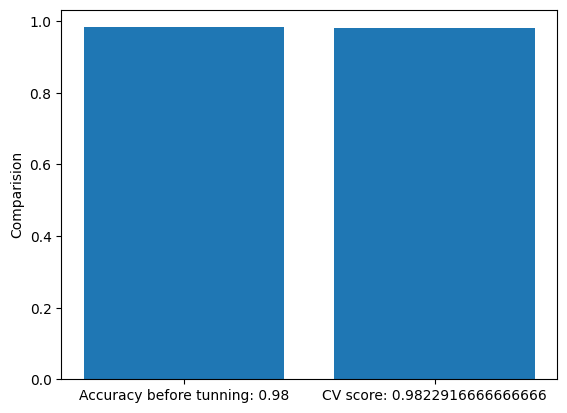

In [ ]:
#Using GridSearchCV for hyperparameter tunning
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#tunning the hyperparameters
param_grid = {
    "C": [0.001, 0.01, 0.1, 1.], #inverse regularization strength
    "penalty": ["l2"], #regularization penalty
    "max_iter": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "fit_intercept": [True, False]
}

log_reg = LogisticRegression(

)
grid_search_log = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search_log.fit(X_train, y_train)

#best combination of hyperparameters
print('Best hyperparameters Combination:', grid_search_log.best_params_)
#best cross validation score
print("Best cross-validation score:", grid_search_log.best_score_)

log_values = [accuracy_train_log, grid_search_log.best_score_]
log_labels = ['Accuracy before tunning: '+ str(round(accuracy_train_log,2)), 'CV score: '+ str(grid_search_log.best_score_)]

plt.bar(log_labels, log_values)
plt.ylabel('Comparision')
plt.show()

In [ ]:
#using best hyperparameters to train new logistic regression model
best_log_reg = LogisticRegression(**grid_search_log.best_params_, random_state=42)
#training the model with full training dataset
best_log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Making predictions on the test dataset
y_log_best_train_pred = best_log_reg.predict(X_train)

# Accuracy of the best model
best_log_train_accuracy = accuracy_score(y_train, y_log_best_train_pred)
print("Accuracy: ", best_log_train_accuracy)

# Confusion matrix of the best model
best_log_train_conf_mat = confusion_matrix(y_train, y_log_best_train_pred)
print("Confusion matrix:\n", best_log_train_conf_mat)

# Precision of the best model
best_log_train_precision = precision_score(y_train, y_log_best_train_pred, average='weighted')
print("Precision: ", best_log_train_precision)

# Recall of the best model
best_log_train_recall = recall_score(y_train, y_log_best_train_pred, average='weighted')
print("Recall: ", best_log_train_recall)

# F1 Score of the best model
best_log_train_f1score = f1_score(y_train, y_log_best_train_pred, average='weighted')
print("F1Score: ", best_log_train_f1score)

# printing the classification report of the best model
best_log_report = classification_report(y_train, y_log_best_train_pred)
print("Classification report:\n", best_log_report)

Accuracy:  0.9833333333333333
Confusion matrix:
 [[519  14]
 [  2 425]]
Precision:  0.983683981945823
Recall:  0.9833333333333333
F1Score:  0.9833539301141003
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       533
           1       0.97      1.00      0.98       427

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Making predictions on the test dataset
y_log_best_pred = best_log_reg.predict(X_test)

# Accuracy of the best model
best_log_accuracy = accuracy_score(y_test, y_log_best_pred)
print("Accuracy: ", best_log_accuracy)

# Confusion matrix of the best model
best_log_conf_mat = confusion_matrix(y_test, y_log_best_pred)
print("Confusion matrix:\n", best_log_conf_mat)

# Precision of the best model
best_log_precision = precision_score(y_test, y_log_best_pred, average='weighted')
print("Precision: ", best_log_precision)

# Recall of the best model
best_log_recall = recall_score(y_test, y_log_best_pred, average='weighted')
print("Recall: ", best_log_recall)

# F1 Score of the best model
best_log_f1score = f1_score(y_test, y_log_best_pred, average='weighted')
print("F1Score: ", best_log_f1score)

# printing the classification report of the best model
best_log_report = classification_report(y_test, y_log_best_pred)
print("Classification report:\n", best_log_report)

Accuracy:  0.9781553398058253
Confusion matrix:
 [[220   9]
 [  0 183]]
Precision:  0.9791793082524272
Recall:  0.9781553398058253
F1Score:  0.9781985426081692
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       229
           1       0.95      1.00      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



Algorithm 3: - SVM Classifier

In [ ]:
from sklearn.svm import SVC
#imported SVC and using linear kernal
svm_model = SVC(kernel='linear')
#training the model using SVM
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#accuracy, precision, recall and f1-score before hypertunning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_train_svm_pred = svm_model.predict(X_train)

svm_train_accuracy = accuracy_score(y_train, y_train_svm_pred)
print("Accuracy: ", svm_train_accuracy)

svm_train_precision = precision_score(y_train, y_train_svm_pred, average='weighted')
print("Precision: ", svm_train_precision)

svm_train_recall = recall_score(y_train, y_train_svm_pred, average='weighted')
print("Recall: ", svm_train_recall)

svm_train_f1score = f1_score(y_train, y_train_svm_pred, average='weighted')
print("F1Score: ", svm_train_f1score)

Accuracy:  0.9864583333333333
Precision:  0.9867503094438322
Recall:  0.9864583333333333
F1Score:  0.9864738400496762


In [ ]:
#accuracy, precision, recall and f1-score before hypertunning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_svm_pred)
print("Accuracy: ", svm_accuracy)

svm_precision = precision_score(y_test, y_svm_pred, average='weighted')
print("Precision: ", svm_precision)

svm_recall = recall_score(y_test, y_svm_pred, average='weighted')
print("Recall: ", svm_recall)

svm_f1score = f1_score(y_test, y_svm_pred, average='weighted')
print("F1Score: ", svm_f1score)

Accuracy:  0.9805825242718447
Precision:  0.9813958216845422
Recall:  0.9805825242718447
F1Score:  0.980617598024794


Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 1.0


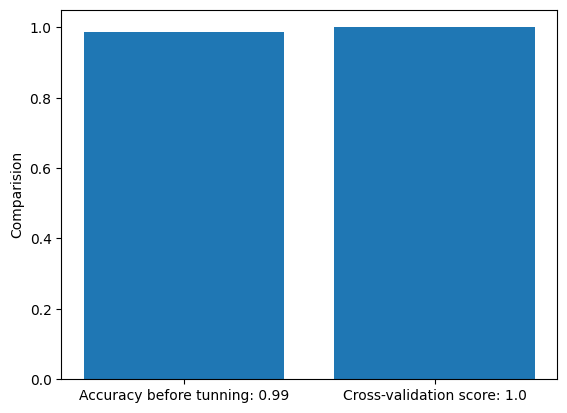

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
param_grid = {
    'C': [10, 100, 500, 1000], #inverse regularization
    'kernel': ['linear','rbf'],
    'gamma': ['auto',0.1, 1]
}

# Create a GridSearchCV object to find the best hyper parameters
grid_svc = GridSearchCV(svm_model, param_grid, cv=3)

# Fitting the GridSearchCV object to the training data
grid_svc.fit(X_train, y_train)

# Printing the best Combination of hyperparameters and the best cross-validation score
print("Best hyperparameters:", grid_svc.best_params_)
print("Best cross-validation score:", grid_svc.best_score_)

svm_values = [svm_train_accuracy, grid_svc.best_score_]
svm_labels = ['Accuracy before tunning: '+ str(round(svm_train_accuracy,2)), 'Cross-validation score: '+ str(grid_svc.best_score_)]

plt.bar(svm_labels, svm_values)
plt.ylabel('Comparision')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

best_svm_model = SVC(**grid_svc.best_params_)
best_svm_model.fit(X_train, y_train)
# Making predictions on the test dataset
y_best_svm_train_pred = best_svm_model.predict(X_train)

# Accuracy of the best model
best_svm_train_accuracy = accuracy_score(y_train, y_best_svm_train_pred)
print("Accuracy: ", best_svm_train_accuracy)

# Confusion matrix of the best model
best_svm_train_conf_mat = confusion_matrix(y_train, y_best_svm_train_pred)
print("Confusion matrix:\n", best_svm_train_conf_mat)

# Precision of the best model
best_svm_train_precision = precision_score(y_train, y_best_svm_train_pred, average='weighted')
print("Precision: ", best_svm_train_precision)

# Recall of the best model
best_svm_train_recall = recall_score(y_train, y_best_svm_train_pred, average='weighted')
print("Recall: ", best_svm_train_recall)

# F1 Score of the best model
best_svm_train_f1score = f1_score(y_train, y_best_svm_train_pred, average='weighted')
print("F1Score: ", best_svm_train_f1score)

# printing the classification report of the best model
best_svm_train_report = classification_report(y_train, y_best_svm_train_pred)
print("Classification report:\n", best_svm_train_report)

Accuracy:  1.0
Confusion matrix:
 [[533   0]
 [  0 427]]
Precision:  1.0
Recall:  1.0
F1Score:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       533
           1       1.00      1.00      1.00       427

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Making predictions on the test dataset
y_best_svm_pred = best_svm_model.predict(X_test)

# Accuracy of the best model
best_svm_accuracy = accuracy_score(y_test, y_best_svm_pred)
print("Accuracy: ", best_svm_accuracy)

# Confusion matrix of the best model
best_svm_conf_mat = confusion_matrix(y_test, y_best_svm_pred)
print("Confusion matrix:\n", best_svm_conf_mat)

# Precision of the best model
best_svm_precision = precision_score(y_test, y_best_svm_pred, average='weighted')
print("Precision: ", best_svm_precision)

# Recall of the best model
best_svm_recall = recall_score(y_test, y_best_svm_pred, average='weighted')
print("Recall: ", best_svm_recall)

# F1 Score of the best model
best_svm_f1score = f1_score(y_test, y_best_svm_pred, average='weighted')
print("F1Score: ", best_svm_f1score)

# printing the classification report of the best model
best_svm_report = classification_report(y_test, y_best_svm_pred)
print("Classification report:\n", best_svm_report)

Accuracy:  1.0
Confusion matrix:
 [[229   0]
 [  0 183]]
Precision:  1.0
Recall:  1.0
F1Score:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Algorithm 4 :- Desicion tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#fitting the decision tree on the training dataset
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#accuracy, precision, recall and f1-score before hypertunning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_train_dt_pred = DT.predict(X_train)

dt_train_accuracy = accuracy_score(y_train, y_train_dt_pred)
print("Accuracy: ", dt_train_accuracy)

dt_train_precision = precision_score(y_train, y_train_dt_pred, average='weighted')
print("Precision: ", dt_train_precision)

dt_train_recall = recall_score(y_train, y_train_dt_pred, average='weighted')
print("Recall: ", dt_train_recall)

dt_train_f1score = f1_score(y_train, y_train_dt_pred, average='weighted')
print("F1Score: ", dt_train_f1score)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1Score:  1.0


In [ ]:
#accuracy, precision, recall and f1-score before hypertunning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_dt_pred = DT.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_dt_pred)
print("Accuracy: ", dt_accuracy)

dt_precision = precision_score(y_test, y_dt_pred, average='weighted')
print("Precision: ", dt_precision)

dt_recall = recall_score(y_test, y_dt_pred, average='weighted')
print("Recall: ", dt_recall)

dt_f1score = f1_score(y_test, y_dt_pred, average='weighted')
print("F1Score: ", dt_f1score)

Accuracy:  0.9878640776699029
Precision:  0.9879884509532745
Recall:  0.9878640776699029
F1Score:  0.9878734021523508


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9677083333333332


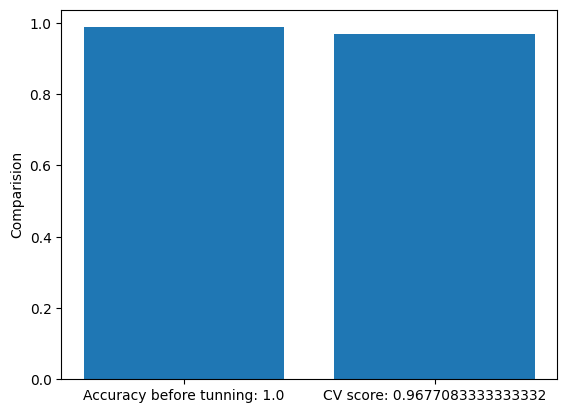

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import math

#hyperparameters one is max_depth as mentioned in question, other is minimum number of samples required to split
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
#decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
#using gridsearch to perform the search for best combination of hyperparameters
grid_search_dt = GridSearchCV(dtc, params, cv=5, return_train_score=True)
#fit the GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)
# Print the best hyperparameters found
print("Best hyperparameters:",grid_search_dt.best_params_)
print("Best cross-validation score:", grid_search_dt.best_score_)

dt_values = [dt_accuracy, grid_search_dt.best_score_]
dt_labels = ['Accuracy before tunning: '+ str(round(dt_train_accuracy,2)), 'CV score: '+ str(grid_search_dt.best_score_)]

plt.bar(dt_labels, dt_values)
plt.ylabel('Comparision')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

#training the decision tree model with best hyperparameters
best_dt_model = DecisionTreeClassifier(**grid_search_dt.best_params_)
best_dt_model.fit(X_train, y_train)
# Making predictions on the test dataset
best_dt_train_y_pred = best_dt_model.predict(X_train)

# Accuracy of the best model
best_dt_train_accuracy = accuracy_score(y_train, best_dt_train_y_pred)
print("Accuracy: ", best_dt_train_accuracy)

# Confusion matrix of the best model
best_dt_train_conf_mat = confusion_matrix(y_train, best_dt_train_y_pred)
print("Confusion matrix:\n", best_dt_train_conf_mat)

# Precision of the best model
best_dt_train_precision = precision_score(y_train, best_dt_train_y_pred, average='weighted')
print("Precision: ", best_dt_train_precision)

# Recall of the best model
best_dt_train_recall = recall_score(y_train, best_dt_train_y_pred, average='weighted')
print("Recall: ", best_dt_train_recall)

# F1 Score of the best model
best_dt_train_f1score = f1_score(y_train, best_dt_train_y_pred, average='weighted')
print("F1Score: ", best_dt_train_f1score)

# printing the classification report of the best model
best_dt_train_report = classification_report(y_train, best_dt_train_y_pred)
print("Classification report:\n", best_dt_train_report)

Accuracy:  0.984375
Confusion matrix:
 [[518  15]
 [  0 427]]
Precision:  0.9849052601809954
Recall:  0.984375
F1Score:  0.984398352328157
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       533
           1       0.97      1.00      0.98       427

    accuracy                           0.98       960
   macro avg       0.98      0.99      0.98       960
weighted avg       0.98      0.98      0.98       960



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Making predictions on the test dataset
best_dt_y_pred = best_dt_model.predict(X_test)

# Accuracy of the best model
best_dt_accuracy = accuracy_score(y_test, best_dt_y_pred)
print("Accuracy: ", best_dt_accuracy)

# Confusion matrix of the best model
best_dt_conf_mat = confusion_matrix(y_test, best_dt_y_pred)
print("Confusion matrix:\n", best_dt_conf_mat)

# Precision of the best model
best_dt_precision = precision_score(y_test, best_dt_y_pred, average='weighted')
print("Precision: ", best_dt_precision)

# Recall of the best model
best_dt_recall = recall_score(y_test, best_dt_y_pred, average='weighted')
print("Recall: ", best_dt_recall)

# F1 Score of the best model
best_dt_f1score = f1_score(y_test, best_dt_y_pred, average='weighted')
print("F1Score: ", best_dt_f1score)

# printing the classification report of the best model
best_dt_report = classification_report(y_test, best_dt_y_pred)
print("Classification report:\n", best_dt_report)

Accuracy:  0.9587378640776699
Confusion matrix:
 [[213  16]
 [  1 182]]
Precision:  0.9615097761023721
Recall:  0.9587378640776699
F1Score:  0.9588515419552043
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       229
           1       0.92      0.99      0.96       183

    accuracy                           0.96       412
   macro avg       0.96      0.96      0.96       412
weighted avg       0.96      0.96      0.96       412



Algorithm 5 :- Deep Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from keras.callbacks import EarlyStopping
from keras import regularizers

# Define the model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.8))
model.add(Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.8))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=100)

# Evaluate the model
y_dnn_pred = model.predict(X_test)
y_dnn_pred = (y_dnn_pred > 0.5).astype(int)
y_dnn_accuracy = accuracy_score(y_test, y_dnn_pred)
y_dnn_precision = precision_score(y_test, y_dnn_pred)
y_dnn_recall = recall_score(y_test, y_dnn_pred)
y_dnn_f1_score = f1_score(y_test, y_dnn_pred)
print("Accuracy: ", y_dnn_accuracy)
print("Precision: ", y_dnn_precision)
print("Recall: ", y_dnn_recall)
print("F1-score: ", y_dnn_f1_score)
print(classification_report(y_test, y_dnn_pred))


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 1.2629 - accuracy: 0.5469
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 1.2701 - accuracy: 0.5156
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1.1356 - accuracy: 0.5365
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 1.0231 - accuracy: 0.5458
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9862 - accuracy: 0.5542
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9148 - accuracy: 0.5510
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9201 - accuracy: 0.5698
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8831 - accuracy: 0.5500
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8609 - accuracy: 0.5813
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8136 - accuracy: 0.5677
Epoch 11/

In [ ]:
#calculating metrics for training dataset
train_dnn_pred = model.predict(X_train)
train_dnn_pred = (train_dnn_pred > 0.5).astype(int)
train_dnn_accuracy = accuracy_score(y_train, train_dnn_pred)
train_dnn_precision = precision_score(y_train, train_dnn_pred)
train_dnn_recall = recall_score(y_train, train_dnn_pred)
train_dnn_f1_score = f1_score(y_train, train_dnn_pred)
print("Accuracy: ", train_dnn_accuracy)
print("Precision: ", train_dnn_precision)
print("Recall: ", train_dnn_recall)
print("F1-score: ", train_dnn_f1_score)
print(classification_report(y_train, train_dnn_pred))


30/30 [==============================] - 0s 1ms/step
Accuracy:  0.9854166666666667
Precision:  0.9791183294663574
Recall:  0.9882903981264637
F1-score:  0.9836829836829838
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       533
           1       0.98      0.99      0.98       427

    accuracy                           0.99       960
   macro avg       0.98      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



<ipython-input-7-2606bc5e13c9>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=new_model, verbose=0)


Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.9417
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9927
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9937
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9896
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9844
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9979
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.9990
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 1.1448e-04 - accuracy: 1.0000
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 7.6733e-05 - accuracy: 1.0000
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 5.3882e-05 - accuracy: 1.00

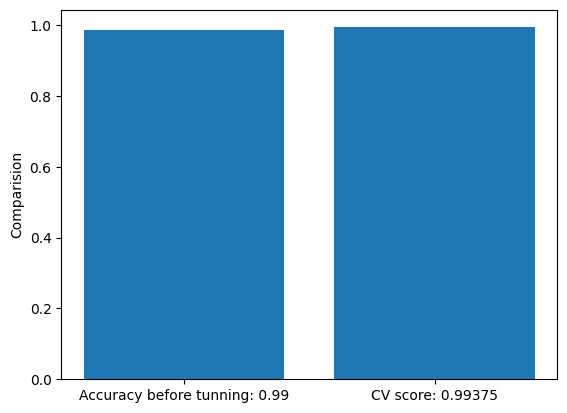

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

def new_model(units=16, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dense(units=8, activation=activation))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier for grid search
model = KerasClassifier(build_fn=new_model, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'units': [16, 32, 64],
    'activation': ['relu', 'sigmoid'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform grid search with cross-validation
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Get the best hyperparameters
best_units = grid.best_params_['units']
best_activation = grid.best_params_['activation']
best_lr = grid.best_params_['learning_rate']

# Train the model with the best hyperparameters
best_model = new_model(units=best_units, activation=best_activation, learning_rate=best_lr)
best_model.fit(X_train, y_train, batch_size=32, epochs=100)
dnn_values = [train_dnn_accuracy, grid.best_score_]
dnn_labels = ['Accuracy before tunning: '+ str(round(train_dnn_accuracy,2)), 'CV score: '+ str(grid.best_score_)]

plt.bar(dnn_labels, dnn_values)
plt.ylabel('Comparision')
plt.show()

In [ ]:
y_best_dnn_train_pred = best_model.predict(X_train)
y_best_dnn_train_pred = (y_best_dnn_train_pred > 0.5).astype(int)
#calucating the prediction metrics
accuracy_dnn_train = accuracy_score(y_train, y_best_dnn_train_pred)
y_dnn_train_precision = precision_score(y_train, y_best_dnn_train_pred)
y_dnn_train_recall = recall_score(y_train, y_best_dnn_train_pred)
y_dnn_train_f1_score = f1_score(y_train, y_best_dnn_train_pred)
#printing the metrics
print("Accuracy: ", accuracy_dnn_train)
print("Precision: ", y_dnn_train_precision)
print("Recall: ", y_dnn_train_recall)
print("F1-score: ", y_dnn_train_f1_score)
print("Classification Report", classification_report(y_train, y_best_dnn_train_pred))

30/30 [==============================] - 0s 1ms/step
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       533
           1       1.00      1.00      1.00       427

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [ ]:
#calculating the metrics
y_best_dnn_pred = best_model.predict(X_test)
y_best_dnn_pred = (y_best_dnn_pred > 0.5).astype(int)
y_best_dnn_accuracy = accuracy_score(y_test, y_best_dnn_pred)
y_best_dnn_precision = precision_score(y_test, y_best_dnn_pred)
y_best_dnn_recall = recall_score(y_test, y_best_dnn_pred)
y_best_dnn_f1_score = f1_score(y_test, y_best_dnn_pred)
#printing the metrics
print("Accuracy: ", y_best_dnn_accuracy)
print("Precision: ", y_best_dnn_precision)
print("Recall: ", y_best_dnn_recall)
print("F1-score: ", y_best_dnn_f1_score)
print(classification_report(y_test, y_best_dnn_pred))
print("Classification Report", classification_report(y_test, y_best_dnn_pred))

13/13 [==============================] - 0s 1ms/step
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



Models Comparision

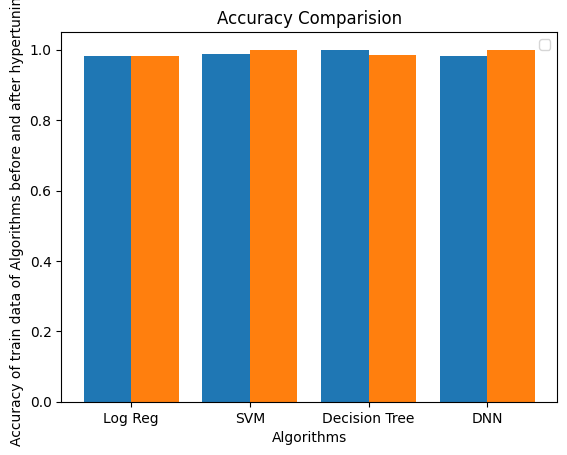

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Log Reg','SVM','Decision Tree','DNN']
Y = [accuracy_train_log,svm_train_accuracy,dt_train_accuracy, train_dnn_accuracy ]
Z = [best_log_train_accuracy,best_svm_train_accuracy,best_dt_train_accuracy, accuracy_dnn_train ]

X_axis = np.arange(len(X))
#plotting the accuracy before hypertuning
plt.bar(X_axis - 0.2, Y, 0.4)
#plotting the accuracy after hypertuning
plt.bar(X_axis + 0.2, Z, 0.4)

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy of train data of Algorithms before and after hypertuning")
plt.title("Accuracy Comparision")
plt.legend()
plt.show()

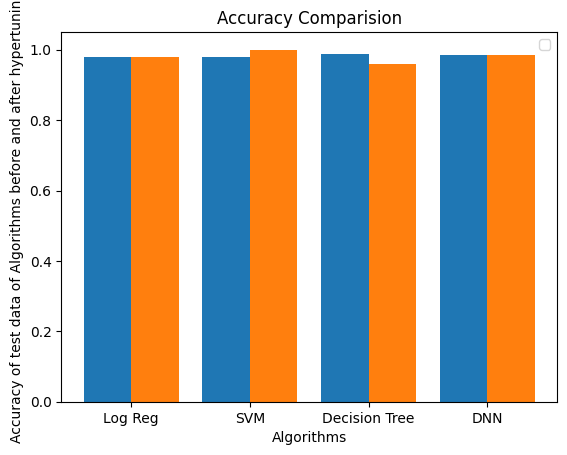

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Log Reg','SVM','Decision Tree','DNN']
Y = [accuracy_log,svm_accuracy,dt_accuracy, y_dnn_accuracy ]
Z = [best_log_accuracy,best_svm_accuracy,best_dt_accuracy, y_dnn_accuracy ]

X_axis = np.arange(len(X))
#plotting the accuracy before hypertuning
plt.bar(X_axis - 0.2, Y, 0.4)
#plotting the accuracy after hypertuning
plt.bar(X_axis + 0.2, Z, 0.4)

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy of test data of Algorithms before and after hypertuning")
plt.title("Accuracy Comparision")
plt.legend()
plt.show()

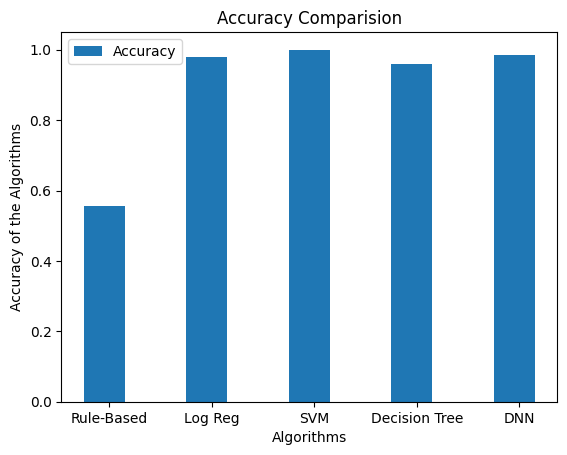

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Rule-Based','Log Reg','SVM','Decision Tree','DNN']
Y = [rule_accuracy,best_log_accuracy,best_svm_accuracy,best_dt_accuracy, y_dnn_accuracy ]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.05, Y, 0.4, label = 'Accuracy')

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy of the Algorithms")
plt.title("Accuracy Comparision")
plt.legend()
plt.show()

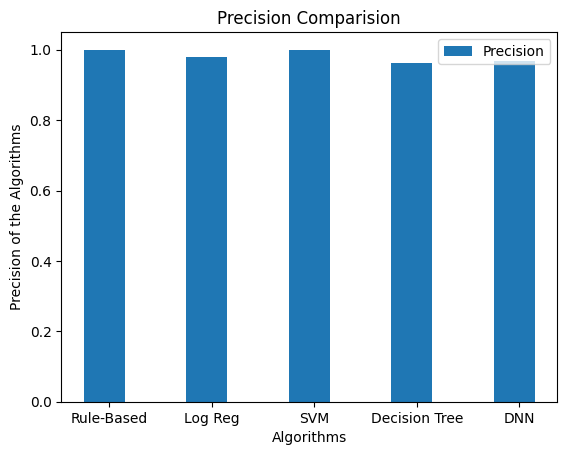

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Rule-Based','Log Reg','SVM','Decision Tree','DNN']
Y = [rule_precision,best_log_precision,best_svm_precision,best_dt_precision, y_dnn_precision]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.05, Y, 0.4, label = 'Precision')

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Precision of the Algorithms")
plt.title("Precision Comparision")
plt.legend()
plt.show()

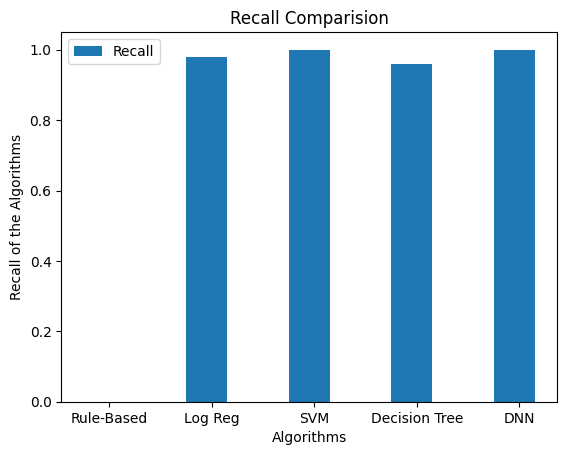

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Rule-Based','Log Reg','SVM','Decision Tree','DNN']
Y = [rule_recall,best_log_recall,best_svm_recall,best_dt_recall, y_dnn_recall]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.05, Y, 0.4, label = 'Recall')

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Recall of the Algorithms")
plt.title("Recall Comparision")
plt.legend()
plt.show()

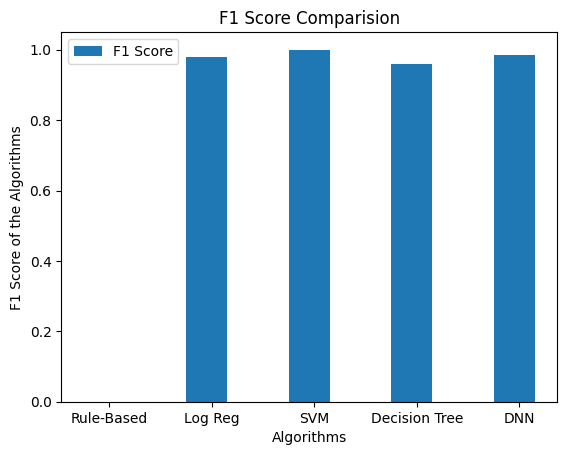

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Rule-Based','Log Reg','SVM','Decision Tree','DNN']
Y = [rule_f1_score,best_log_f1score,best_svm_f1score,best_dt_f1score, y_dnn_f1_score]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.05, Y, 0.4, label = 'F1 Score')

plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("F1 Score of the Algorithms")
plt.title("F1 Score Comparision")
plt.legend()
plt.show()